In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import os
import copy

# os.chdir('/content/drive/MyDrive/Colab Notebooks/Shashank')

# os.chdir('/Users/shashanksule/Documents/TMDmaps')
# Regular Modules
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
#from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.io
import time 
from mpl_toolkits.mplot3d import axes3d
# parallelization modules 

from math import nan
from joblib import Parallel, delayed
import multiprocessing
import itertools



# Load data

In [74]:
gibbs_data = np.load("muller_metadynamics.npy", allow_pickle=True).item()
args = gibbs_data['args']
results = gibbs_data['sim_results']
errors = results['error_tensor'][:,:,0,0]
sestimates = results['singer_estimates'][:,:,0,0]

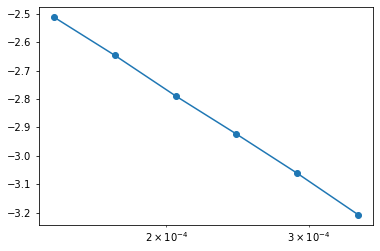

In [110]:
fig, ax = plt.subplots()
ax.set(xscale="log")
ax.plot(args['epsilons'][13:19], np.log(errors[13:19,1]), marker="o")
#ax.set(ylim=(0,0.05))